In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [3]:
import os
os.chdir('/home/gilles/documents/websites/support.gillespilon.ca/')

In [4]:
history = subprocess.check_output(
    ['git', 'log', '--pretty=%aI', '--author=Gilles'],
    universal_newlines=True
).splitlines()

In [5]:
history

['2017-10-11T15:00:25-05:00',
 '2017-10-11T14:58:36-05:00',
 '2017-10-11T09:55:24-05:00',
 '2017-10-10T13:39:02-05:00',
 '2017-10-10T13:37:25-05:00',
 '2017-10-10T13:33:54-05:00',
 '2017-10-10T13:30:45-05:00',
 '2017-10-10T13:27:52-05:00',
 '2017-10-10T13:25:32-05:00',
 '2017-10-10T13:23:05-05:00',
 '2017-10-10T13:20:56-05:00',
 '2017-10-10T13:09:02-05:00',
 '2017-10-10T13:03:14-05:00',
 '2017-10-10T12:57:52-05:00',
 '2017-10-10T12:53:47-05:00',
 '2017-10-10T12:50:44-05:00',
 '2017-10-10T12:45:32-05:00',
 '2017-10-10T12:44:56-05:00',
 '2017-10-10T12:40:13-05:00',
 '2017-10-10T11:08:59-05:00',
 '2017-10-10T11:07:56-05:00',
 '2017-10-10T11:03:22-05:00',
 '2017-10-10T11:02:08-05:00',
 '2017-10-10T10:50:18-05:00',
 '2017-10-10T10:48:54-05:00',
 '2017-10-10T10:44:37-05:00',
 '2017-10-10T10:37:30-05:00',
 '2017-10-10T09:49:14-05:00',
 '2017-10-10T09:46:41-05:00',
 '2017-10-10T09:42:18-05:00',
 '2017-10-10T09:39:06-05:00',
 '2017-10-10T09:25:15-05:00',
 '2017-10-10T08:49:58-05:00',
 '2017-10-

In [6]:
from dateutil.parser import parse as parsedate
dates = list(map(parsedate, history))

In [7]:
df = pd.DataFrame.from_dict({'Date': dates},
                            dtype='datetime64[ns]') \
                 .set_index('Date')

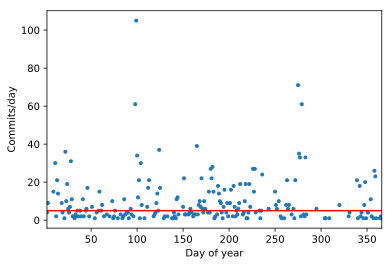

In [8]:
counts = df.reset_index() \
           .groupby(df.index.dayofyear) \
           .agg('count')
ax = counts.plot(style='.', legend=False)
ax.axhline(int(counts.median()), color='red')
ax.set_ylabel('Commits/day')
ax.set_xlabel('Day of year')

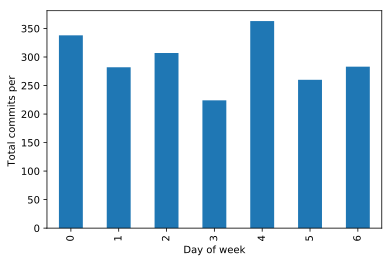

In [9]:
counts = df.reset_index() \
           .groupby(df.index.dayofweek) \
           .agg('count')
ax = counts.plot.bar(legend=False)
ax.set_ylabel('Total commits per ')
ax.set_xlabel('Day of week')

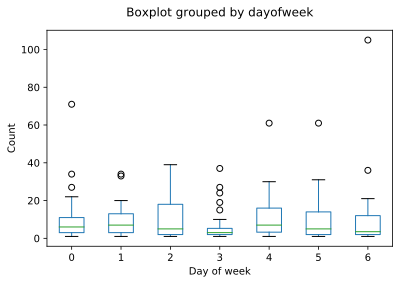

In [10]:
counts = df.reset_index().groupby([df.index.weekofyear,
                                   df.index.dayofweek]).agg('count')
counts.index.set_names(['weekofyear', 'dayofweek'], inplace=True)
counts.rename(columns={'Date': 'count'}, inplace=True)
ax = counts.boxplot(by='dayofweek', grid=False)
ax.set_xlabel('Day of week')
ax.set_ylabel('Count')
ax.set_title('')
ax

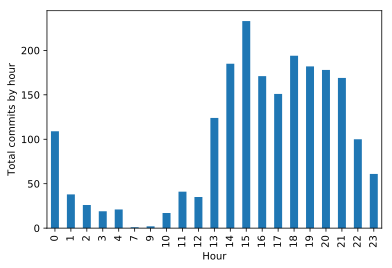

In [11]:
counts = df.reset_index() \
           .groupby(df.index.hour) \
           .agg('count')
ax = counts.plot.bar(legend=False)
ax.set_ylabel('Total commits by hour')
ax.set_xlabel('Hour')

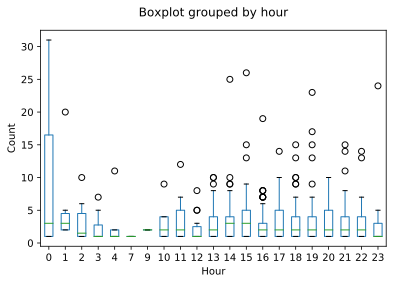

In [12]:
counts = df.reset_index().groupby([df.index.date,
                                   df.index.hour]).agg('count')
counts.index.set_names(['date', 'hour'], inplace=True)
counts.rename(columns={'Date': 'count'}, inplace=True)
ax = counts.boxplot(by='hour', grid=False)
ax.set_title('')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')

In [13]:
df = pd.DataFrame.from_dict(
    [{'datetime': parsedate(aI), 'author': aN}
     for aI, aN
     in (line.split(maxsplit=1)
         for line
         in subprocess.check_output(['git', 'log', '--pretty=%aI %aN', '--no-merges'],
                                    universal_newlines=True)
                      .splitlines())]
)
df = df.astype({'datetime': 'datetime64[ns]'})
df['author'] = df['author'].map({
    'Gilles Pilon': 'Gilles'})
df.describe()

,author,datetime
count,2057,2059
unique,1,2059
top,Gilles,2017-07-17 15:33:18
freq,2057,1
first,NaN,2016-03-07 00:39:25
last,NaN,2017-10-11 20:00:25


In [14]:
counts = df.groupby('author').agg('count')
counts.rename(columns={'datetime': 'count'}, inplace=True)
counts

,count
author,
Gilles,2057


In [15]:
counts.describe()

,count
count,1.0
mean,2057.0
std,NaN
min,2057.0
25%,2057.0
50%,2057.0
75%,2057.0
max,2057.0


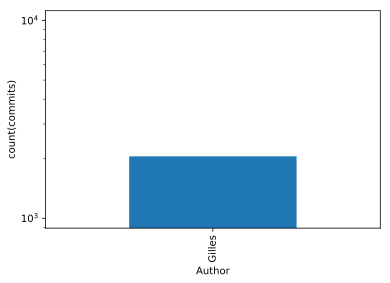

In [16]:
ax = counts.sort_index().plot.bar(y='count', logy=True, legend=False)
ax.set_xlabel('Author')
ax.set_ylabel('count(commits)')

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

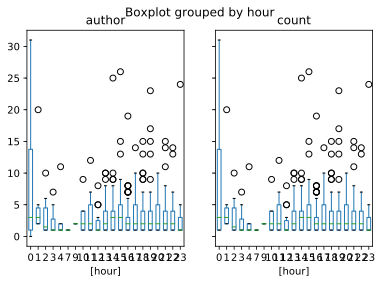

In [17]:
df = df.set_index('datetime')
counts = df.reset_index() \
           .groupby([df.index.date,
                     df.index.hour]) \
           .agg('count')
counts.index.set_names(['date', 'hour'], inplace=True)
counts.rename(columns={'datetime': 'count'}, inplace=True)
ax = counts.boxplot(by='hour', grid=False)
ax.set_title('')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')